In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Generate N random positive numbers, and N negative numbers.
# The mean is 2 and -2 respectively, the std is 0.5.
N = 100
r1 = -2 + 0.5*np.random.randn(N,1)
r2 = 2 + 0.5*np.random.randn(N,1)
r = np.concatenate([r1,r2])
zeros = np.zeros((N,1))
print(r[0:].size)
print(r[:1].size)


200
1


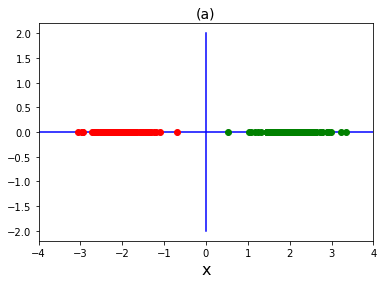

In [2]:
xx = np.linspace(0, 0, 10)
yy = np.linspace(-2, 2, 10)
plt.plot(xx,yy,'-b')
xx = np.linspace(-10, 10, 10)
yy = np.linspace(0, 0, 10)
plt.plot(xx,yy,'-b')

plt.xlim([-4, 4])
# plt.ylim([-0.1,0.1])

plt.plot(r1,zeros, 'ro')
plt.plot(r2,zeros, 'go')

plt.xlabel('x', size=16)
plt.title('(a)',size=14)

plt.show()


In [3]:


class_column = np.concatenate((np.ones((N,1)),np.ones((N,1))+1), axis=0)
class_column.shape

x_train = np.concatenate((r, class_column), axis=1)
x_test = np.linspace(-4,4,800)


In [4]:
def class_gen(x_train, x_test, K):
        I = x_train.size
        